#Amazon Sales Data

##Load the necessary libraries. Import and load the  Amazon Sales Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
%matplotlib inline

In [2]:
# Get the Data
sales=pd.read_csv('/content/Amazon Sales data.csv')

##To get familiar with the data

##print first 5 and Last 5 records

In [30]:
sales.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36,2012
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013


In [31]:
sales.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72,2011
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47,2011
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05,2016
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02,2015
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,2/10/2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91,2012


##Find rows and columns are present in the dataset

In [6]:
#Rows an columns
sales.shape

(100, 14)

In [7]:
#Rows
sales.shape[0]

100

In [8]:
#Columns
sales.shape[1]



14

##Find the starting Index

In [9]:
sales.index

RangeIndex(start=0, stop=100, step=1)

##Find column Names

In [10]:
sales.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

##Find the Datatype

In [11]:
sales.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

##Find Missing or Null values

In [12]:
sales.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

##We have No missing or Null values

##Descriptive Statistics

In [13]:
sales.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


#Line plot for columns country and Units sold

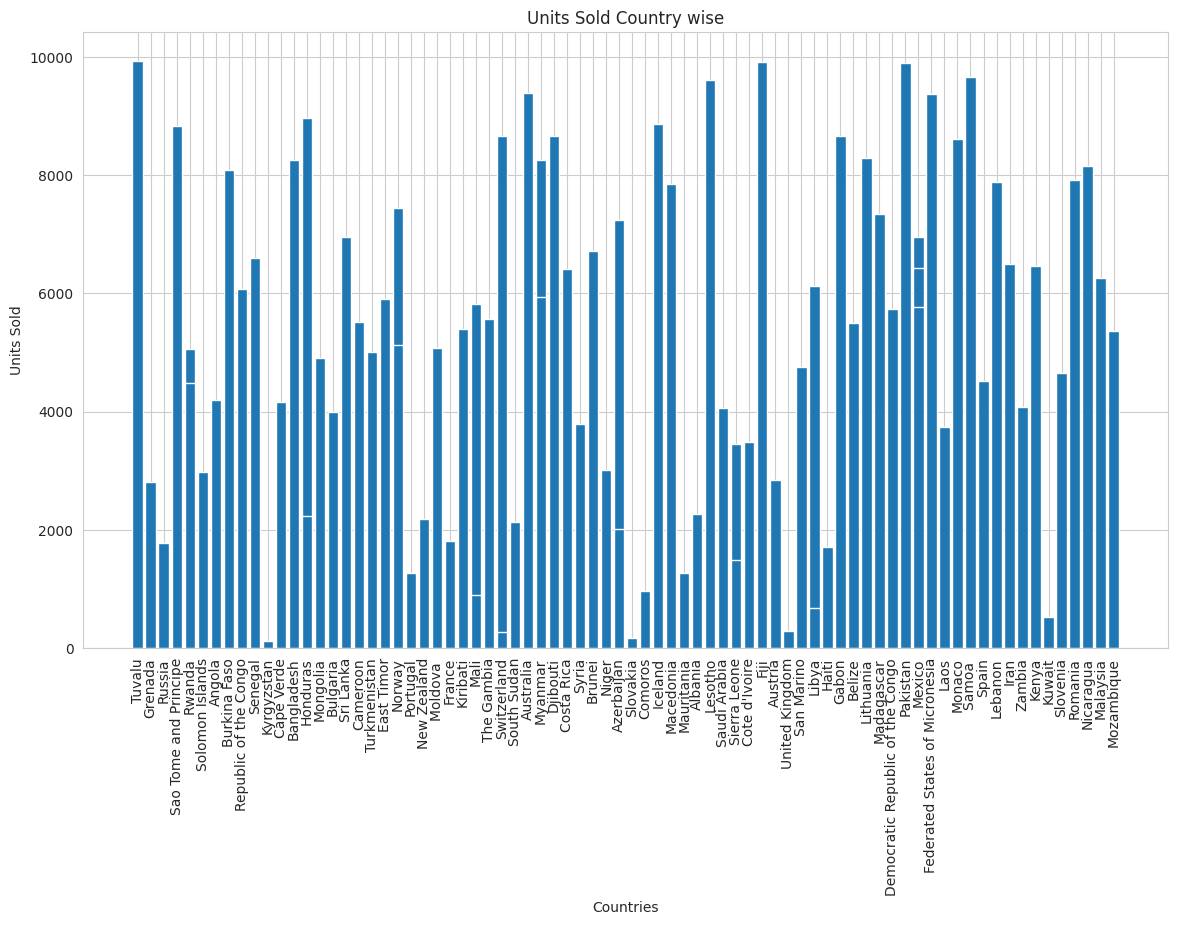

In [29]:
plt.figure(figsize=(14,8))
plt.bar(sales['Country'],sales['Units Sold'])
plt.xlabel('Countries')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
sns.set_style('whitegrid')
plt.title('Units Sold Country wise');
plt.show()

##From the above observation we know that the country tuvalu has highest units sold.

#Lets find the Sales by Region

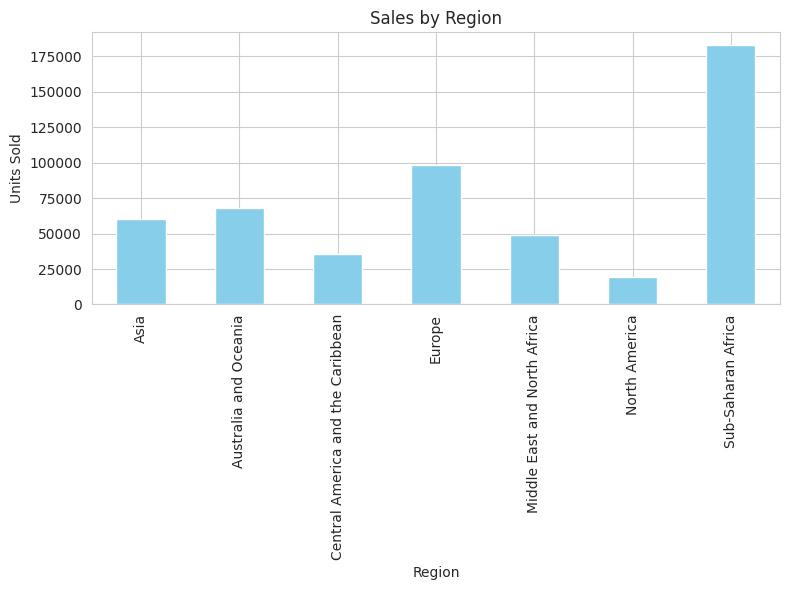

In [15]:
region_sales = sales.groupby('Region')['Units Sold'].sum()

plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


##Observation: Sub-Saharan Africa has the high number of sales of more than 175000

#Sales by Item Type using Pie Chart

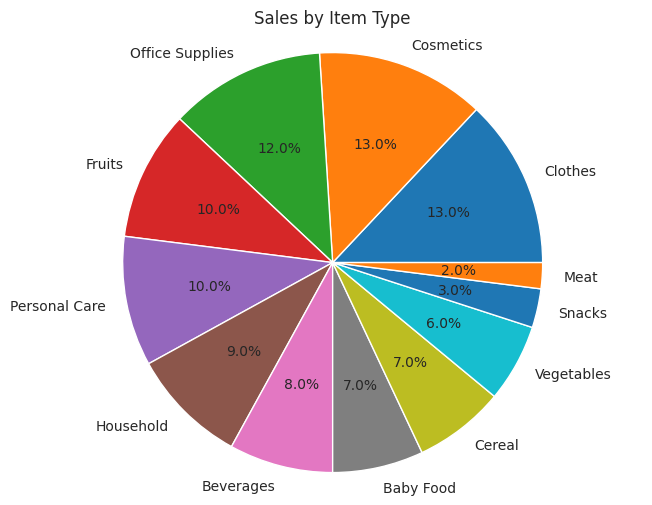

In [16]:
item_counts=sales['Item Type'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(item_counts, autopct='%1.1f%%', labels=item_counts.index)
plt.title('Sales by Item Type')
plt.axis('equal')
plt.show()


##Observation: From the above Piechart we can see that the Cosmetics and Clothes are equally bought with 13% followed by office supplies and others

##Sales Trend over Time

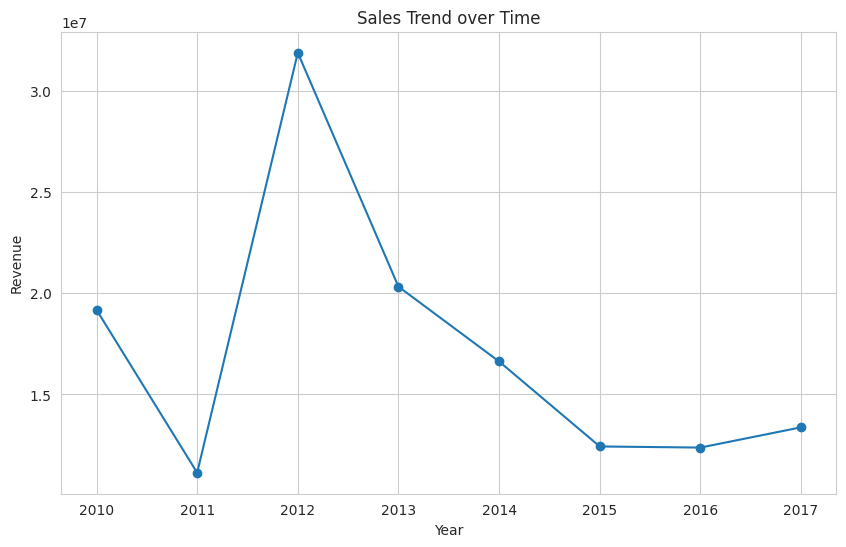

In [17]:
sales['Year'] = pd.to_datetime(sales['Order Date']).dt.year
yearly_sales = sales.groupby('Year')['Total Revenue'].sum()
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales,'o-')
plt.title('Sales Trend over Time')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.show()

##Observation: From the above chart we can see the Sales had reached high during the year 2012 and later it falls down

##Find Unit Price vs. Units Sold using scatterplot with Region as hue

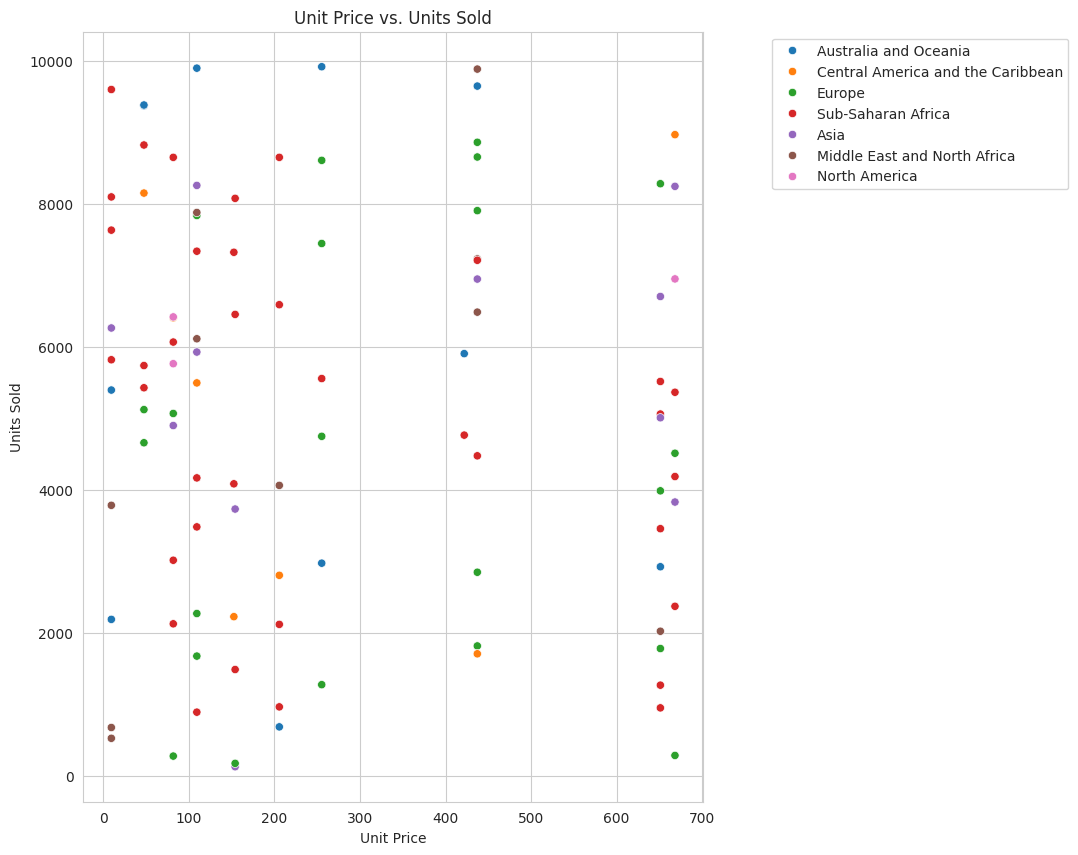

In [18]:
plt.figure(figsize=(8, 10))
sns.scatterplot(x='Unit Price',y='Units Sold',data=sales, hue='Region')
plt.title('Unit Price vs. Units Sold')
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.legend(loc='upper left', bbox_to_anchor=(1.1,1))
plt.show()



##Observation: From the Above Scatterplot we can see the Units Price and Units Sold in the Regions

##Sales by Region and Item Type using Heatmap

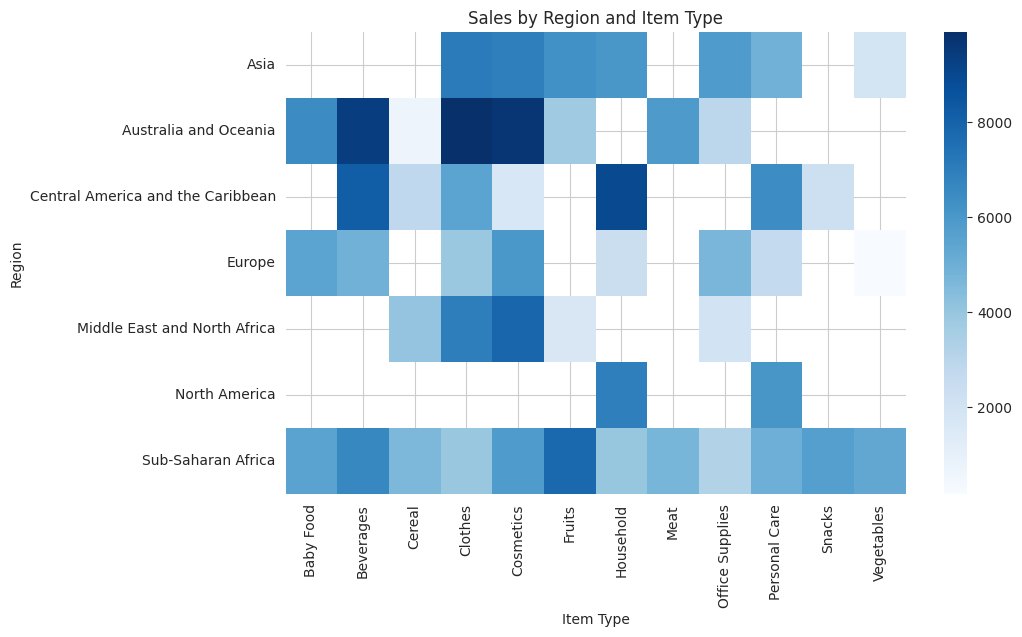

In [19]:
df=sales.pivot_table(index='Region',columns='Item Type',values='Units Sold')
plt.figure(figsize=(10, 6))
sns.heatmap(df,cmap='Blues')
plt.title('Sales by Region and Item Type')
plt.xlabel('Item Type')
plt.ylabel('Region')
plt.show()


##Observation: From the Above Heatmap we can understand Australia and Oceania had huge Number of Sales for Clothes,Cosmetics and Beverages

##Find the Sales Channel and Units Sold using Box Plot

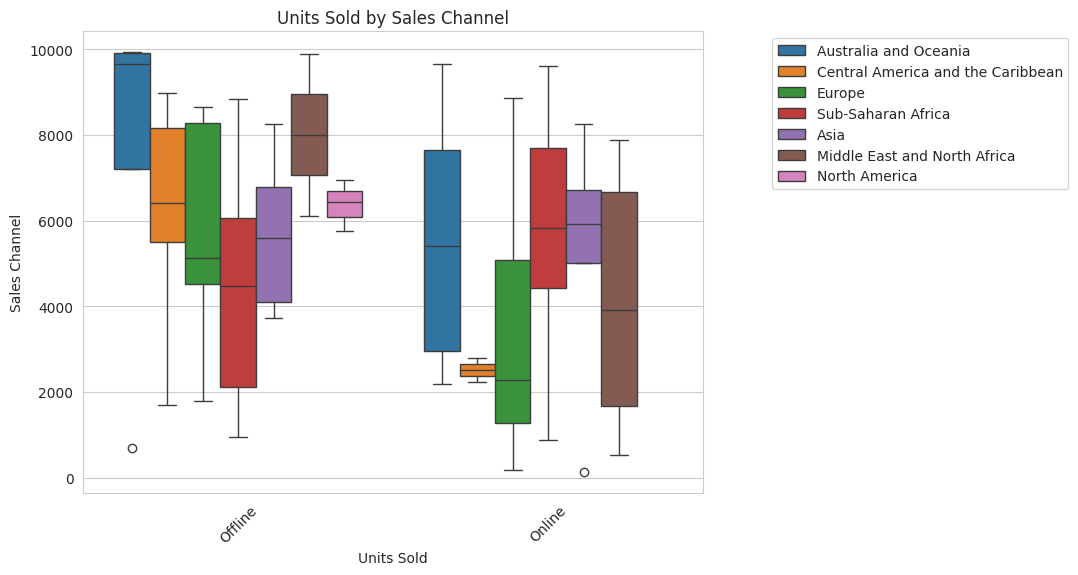

In [20]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sales Channel', y='Units Sold',hue='Region',data=sales)
plt.title('Units Sold by Sales Channel')
plt.xlabel('Units Sold')
plt.ylabel('Sales Channel')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1.1,1))
plt.show()


##Observation: From the Above box plot we can get that Which regions use the Online mode for purchase more and which regions use offline purchasing.North Amercians Only has Offline purchases

##Find the the average unit price accross the countries using the line plot

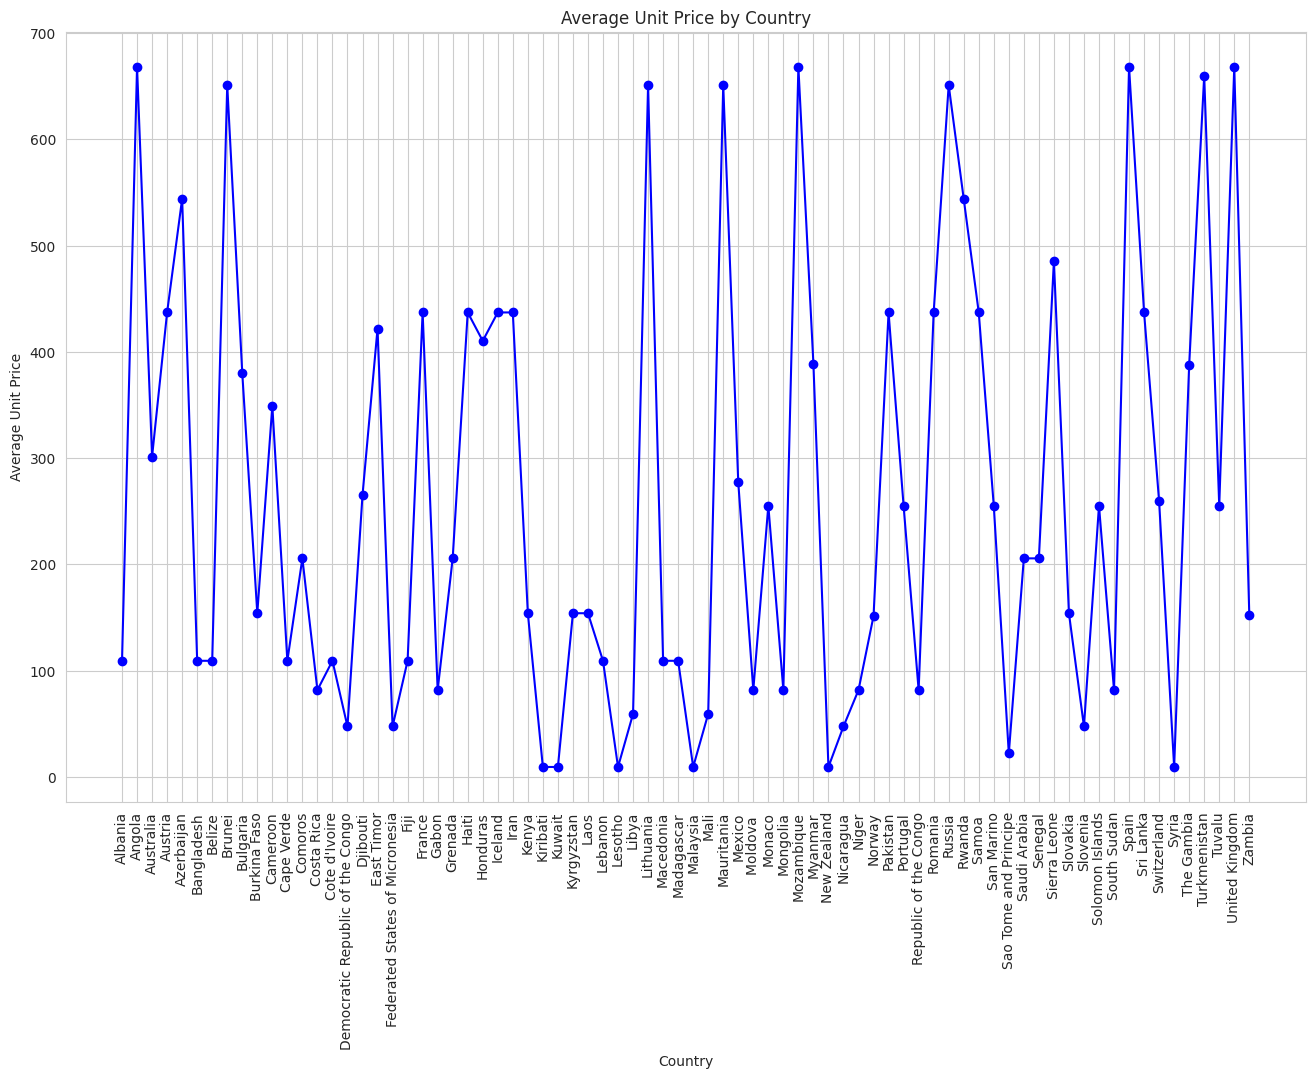

In [25]:
avg_price = sales.groupby('Country')['Unit Price'].mean()
plt.figure(figsize=(16, 10))
plt.plot(avg_price,'o-b')
plt.title('Average Unit Price by Country')
plt.xlabel('Country')
plt.ylabel('Average Unit Price')
plt.xticks(rotation=90)
plt.show()


##Observation: From the above plot we can find the average unit price of the country.